In [1]:
from jax import grad
from scipy.integrate import solve_ivp
import jax.numpy as jnp
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import scipy.ndimage
import sklearn
import pysindy as ps

In [115]:
alpha = np.array([[3],[4],[7.2]])
beta = np.array([[-2,-1,0],[0,-1,-2],[-2.6,-1.6,-3]])
z = np.array([[.1],[.8],[.3]])

In [167]:
def glv(t ,z, alpha, beta):
    z1 = np.array([z])
    temp = z1.T * (alpha + beta @ z1.T)
    return temp.T.reshape(3).tolist()

In [181]:
z0=[.1,.8,.3]
t_eval = np.linspace(0, 50, 500)
t_span = (t_eval[0], t_eval[-1])
sol = solve_ivp(glv, t_span, z0, t_eval=t_eval, args=(alpha, beta))
tf = sol.t
xf = sol.y[0]
yf = sol.y[1]
zf = sol.y[2]

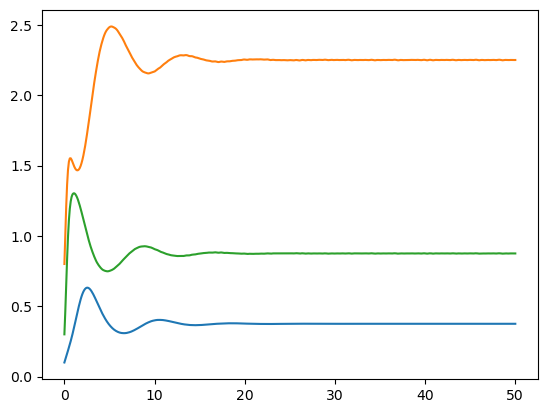

In [182]:
plt.figure()
plt.plot(tf, xf)
plt.plot(tf, yf)
plt.plot(tf, zf)
plt.show()

In [190]:
sol_noisy = sol.y + np.random.uniform(size=(np.shape(sol.y)))

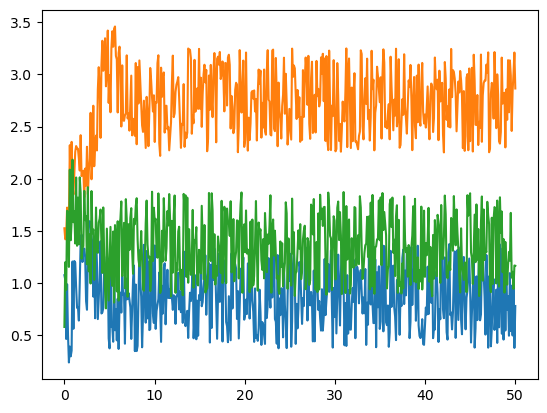

In [191]:
plt.figure()
plt.plot(tf, sol_noisy[0])
plt.plot(tf, sol_noisy[1])
plt.plot(tf, sol_noisy[2])
plt.show()

In [206]:
smooth_y = scipy.ndimage.gaussian_filter1d(sol_noisy[0], sigma=15)
smooth_x = scipy.ndimage.gaussian_filter1d(sol_noisy[1], sigma=15)
smooth_z = scipy.ndimage.gaussian_filter1d(sol_noisy[2], sigma=15)

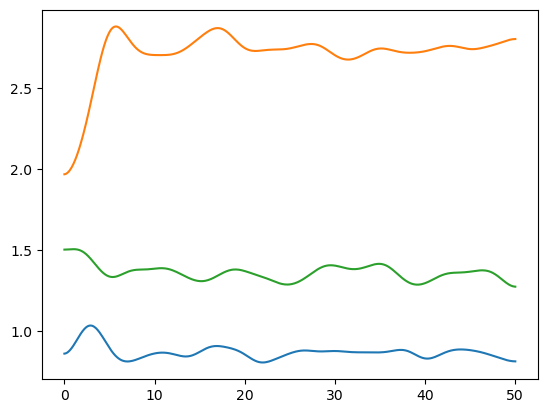

In [207]:
plt.figure()
plt.plot(tf, smooth_y)
plt.plot(tf, smooth_x)
plt.plot(tf, smooth_z)
plt.show()